### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

#**Author: Muhammad Firman Alamsyah**

In [99]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df

In [100]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

* Display the first 5 observation of the dataset

In [101]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.

In [103]:
df.info()
"""
Summary
-There are 7050 rows and 16 columns from the dataset with 4 columns of 'float' dtype, 2 columns of 'object' dtype, and 10 columns of 'integer' dtype
-From 16 columns, there are missing values for all rows in 'Column1', 'Column2', 'Column3', 'Column4' that need to be treated(drop those columns)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

"\nSummary\n-There are 7050 rows and 16 columns from the dataset with 4 columns of 'float' dtype, 2 columns of 'object' dtype, and 10 columns of 'integer' dtype\n-From 16 columns, there are missing values for all rows in 'Column1', 'Column2', 'Column3', 'Column4' that need to be treated(drop those columns)\n"

* Perform EDA viz. Is there any missing values in each column of the provided dataset

In [104]:
#There are a lot of 0 value from the table, we need to assign that 0 to be a missing value. So we can exclude/drop it from table
miss_value=[0]
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv', na_values=miss_value)

In [105]:
df.isnull().sum()
# There are missing values for all rows in 'Column1', 'Column2', 'Column3', 'Column4' that need to be treated(drop those columns)
# Im gonna drop 'Column1', 'Column2', 'Column3', 'Column4' because those columns have a missing value for each row

status_id              0
status_type            0
status_published       0
num_reactions        121
num_comments        2119
num_shares          3911
num_likes            126
num_loves           4230
num_wows            5308
num_hahas           5916
num_sads            6443
num_angrys          6627
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [106]:
#drop the columns that have a missing value
df=df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,NaN
1,2,photo,4/21/2018 22:45,150.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227.0,236.0,57.0,204.0,21.0,1.0,1.0,NaN,NaN
3,4,photo,4/21/2018 2:29,111.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213.0,NaN,NaN,204.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89.0,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16.0,NaN,NaN,14.0,1.0,NaN,1.0,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351.0,12.0,22.0,349.0,2.0,NaN,NaN,NaN,NaN


In [107]:
#fill the missing values with previous value
df=df.fillna(method='ffill')
df.isnull().sum()
#drop the rest of missing values
df.dropna(axis=0, inplace=True)

In [108]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [109]:
#Univariate Analysis
df.describe()

# Summary of Descriptive Statistics for each columns that only have 'integer' or 'float' dtype

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.00000,7044.000000
mean,3528.500000,230.590006,304.185548,73.998438,215.497587,22.776973,2.736087,2.920926,1.72686,1.587450
std,2033.571981,462.831548,944.274595,155.008606,449.682754,44.952713,9.565933,6.057828,2.96629,2.674896
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1767.750000,17.000000,2.000000,1.000000,17.000000,2.000000,1.000000,1.000000,1.00000,1.000000
50%,3528.500000,60.000000,9.000000,4.000000,58.000000,2.000000,1.000000,1.000000,1.00000,1.000000
75%,5289.250000,219.000000,137.500000,74.000000,185.000000,26.000000,2.000000,3.000000,1.00000,1.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.00000,31.000000


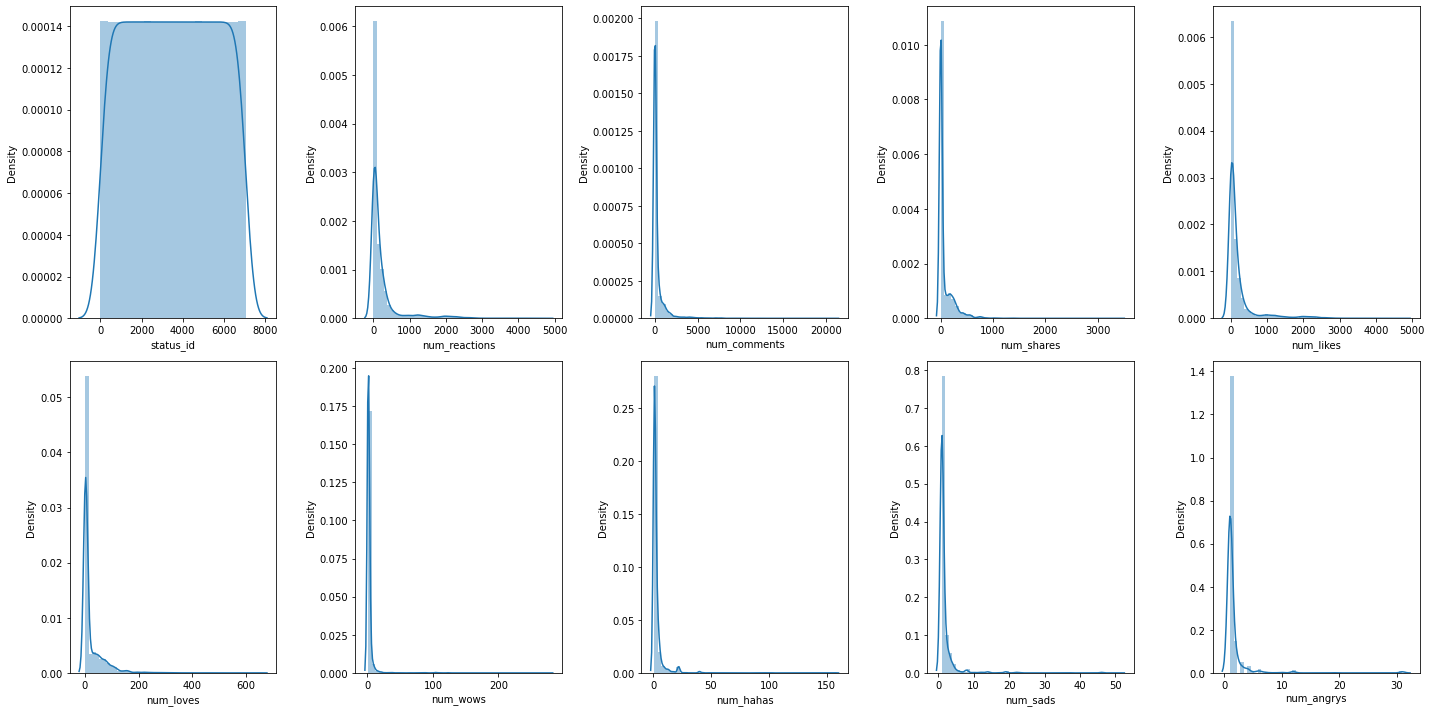

In [110]:
# plot in distribution graph to see the distribution for each column
plt.figure(figsize=(20,10))
for i in enumerate (df.describe().columns):
  plt.subplot(2,5, i[0]+1)
  sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

In [111]:
#calculate skewness
df.skew(axis=0)
#each column('integer' and 'float' dtypes only) has a positive value of skewness

status_id         0.000000
num_reactions     3.734434
num_comments      7.754637
num_shares        4.617000
num_likes         3.914858
num_loves         4.189390
num_wows         15.465465
num_hahas        11.014814
num_sads          9.347987
num_angrys        8.735784
dtype: float64

In [112]:
#Multivariate Analysis
df.corr()
#to see the linear relationship for each column

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,1.000000,-0.187349,0.237750,0.338045,-0.209165,0.286678,0.057990,0.140651,0.062744,0.058255
num_reactions,-0.187349,1.000000,0.105690,0.132114,0.994914,0.184652,0.219727,0.049009,0.029002,0.018755
num_comments,0.237750,0.105690,1.000000,0.515043,0.061005,0.446999,0.114055,0.141086,0.057662,0.087655
num_shares,0.338045,0.132114,0.515043,1.000000,0.070223,0.663023,0.270358,0.159054,0.039489,0.015038
num_likes,-0.209165,0.994914,0.061005,0.070223,1.000000,0.104238,0.167896,0.020535,0.022387,0.013019
num_loves,0.286678,0.184652,0.446999,0.663023,0.104238,1.000000,0.380795,0.222249,0.024319,0.050176
num_wows,0.057990,0.219727,0.114055,0.270358,0.167896,0.380795,1.000000,0.174811,0.047332,0.051394
num_hahas,0.140651,0.049009,0.141086,0.159054,0.020535,0.222249,0.174811,1.000000,0.048585,0.043980
num_sads,0.062744,0.029002,0.057662,0.039489,0.022387,0.024319,0.047332,0.048585,1.000000,0.040607
num_angrys,0.058255,0.018755,0.087655,0.015038,0.013019,0.050176,0.051394,0.043980,0.040607,1.000000


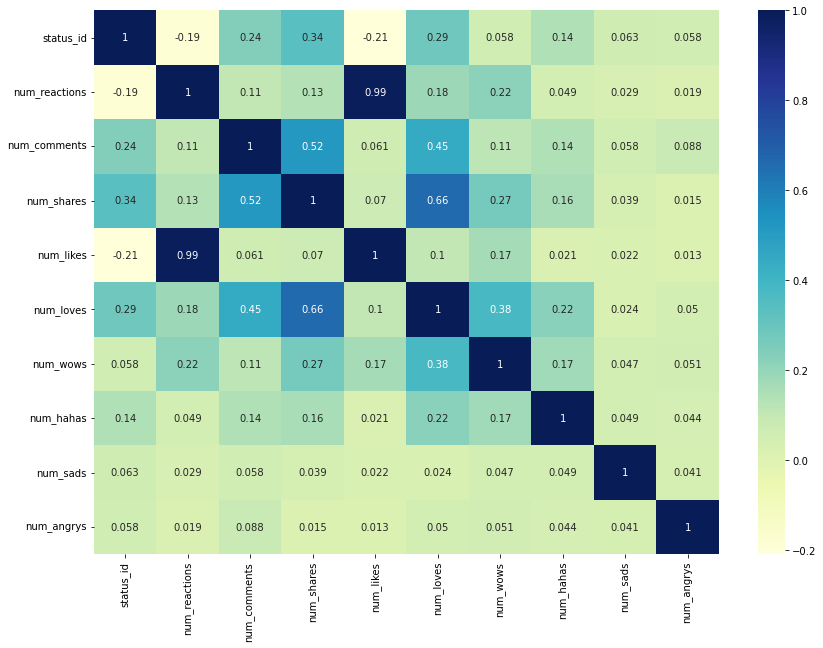

In [113]:
#Heatmap of linear correlation for each column
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="YlGnBu")
plt.show()

* Display all the unique status_type of the dataframe

In [114]:
print(df['status_type'].unique())

['video' 'photo' 'link' 'status']


In [115]:
#Sum of unique values in status_type column
print(df['status_type'].value_counts())

photo     4284
video     2332
status     365
link        63
Name: status_type, dtype: int64


* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
def Encoder(df):
  columnsToEncode= list(df.select_dtypes(include=['category', 'object']))
  le= LabelEncoder()
  for feature in columnsToEncode:
    try:
      df[feature]= le.fit_transform(df[feature])
    except:
      print('Error encoding'+feature)
  return df

In [118]:
df= Encoder(df)

In [119]:
df
#we can see from the new df, status_type and status_published have been changed into numerical representation by labelencoder

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6,7,3,3826,503.0,614.0,72.0,418.0,70.0,10.0,2.0,1.0,3.0
7,8,3,3818,295.0,453.0,53.0,260.0,32.0,1.0,1.0,1.0,1.0
8,9,1,3810,203.0,1.0,53.0,198.0,5.0,1.0,1.0,1.0,1.0
9,10,1,3747,170.0,9.0,1.0,167.0,3.0,1.0,1.0,1.0,1.0
10,11,1,3718,210.0,2.0,3.0,202.0,7.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,6685,89.0,2.0,3.0,89.0,1.0,1.0,1.0,3.0,1.0
7046,7047,1,6670,16.0,2.0,3.0,14.0,1.0,1.0,1.0,3.0,1.0
7047,7048,1,6637,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0
7048,7049,1,6619,351.0,12.0,22.0,349.0,2.0,1.0,1.0,3.0,1.0


In [120]:
df.info()
#status_type and status_published column have been converted from 'object' dtype into 'int' dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7044 entries, 6 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7044 non-null   int64  
 1   status_type       7044 non-null   int32  
 2   status_published  7044 non-null   int32  
 3   num_reactions     7044 non-null   float64
 4   num_comments      7044 non-null   float64
 5   num_shares        7044 non-null   float64
 6   num_likes         7044 non-null   float64
 7   num_loves         7044 non-null   float64
 8   num_wows          7044 non-null   float64
 9   num_hahas         7044 non-null   float64
 10  num_sads          7044 non-null   float64
 11  num_angrys        7044 non-null   float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 660.4 KB


###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique

In [121]:
#normalize to scale numerical data prior with min max technique
from sklearn.preprocessing import MinMaxScaler
#build the scaler model
scaler=MinMaxScaler()

#i clustering the dataset based on num_loves and num_hahas feature
col=['num_loves', 'num_hahas']
df_scl=scaler.fit_transform(df[col])
new_df=pd.DataFrame(data=df_scl, columns=col)
new_df
#all of the feature has been normalization with min-max scalling, so the data values in range of 0 to 1

,num_loves,num_hahas
0,0.105183,0.00641
1,0.047256,0.00000
2,0.006098,0.00000
3,0.003049,0.00000
4,0.009146,0.00000
...,...,...
7039,0.000000,0.00000
7040,0.000000,0.00000
7041,0.000000,0.00000
7042,0.001524,0.00000


*   Use Elbow method to determine the number of cluster to be formed

In [122]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [123]:
k_rng= range(1,11) #range of clusters that we want to calculate for SSE
sse=[] #sum squared of error
siscore=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(new_df)
    sse.append(km.inertia_)
    if k>1:
        siscore.append(silhouette_score(new_df, labels=km.fit_predict(new_df)))
sse

[43.69254028216358,
 23.221878441339708,
 15.720118988918038,
 11.057655588246863,
 8.640449571500081,
 6.3651872433849475,
 5.296497638824265,
 4.268876762258233,
 3.6014651137084575,
 3.1763310467063812]

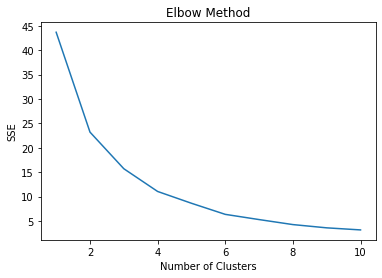

In [124]:
#elbow method graph
plt.plot(k_rng, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()
# from the graph, it seems the number optimal number of clusters to be formed is 4

*   Verify optimal number of clusers on the basis of silhouette scores

In [125]:
#verify the optimal number of clusters with silhouette scores
siscore

[0.7383158930823801,
 0.7179608547094287,
 0.750608753020104,
 0.7243232689889706,
 0.7280594109742092,
 0.7285729449067393,
 0.709854507698622,
 0.7068096199021904,
 0.7133147621130369]

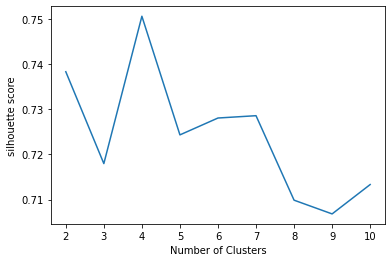

In [126]:
#silhouette score graph
plt.plot(range(2,11), siscore)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
# from the graph, we can see the optimal number of clusters to be formed is 4

*   Assigning cluster label to each instance of the dataframe

In [127]:
#kmeans for 3 cluster
kmeans1=KMeans(n_clusters=4)
#assigning cluster label to each instance of the dataframe
new_df['Label_cluster']=kmeans1.fit_predict(new_df)
new_df.head(10)

,num_loves,num_hahas,Label_cluster
0,0.105183,0.006410,2
1,0.047256,0.000000,0
2,0.006098,0.000000,0
3,0.003049,0.000000,0
4,0.009146,0.000000,0
5,0.006098,0.000000,0
6,0.007622,0.000000,0
7,0.010671,0.000000,0
8,0.013720,0.000000,0
9,0.033537,0.025641,0


In [128]:
#cluster 1
clus_1=new_df[new_df['Label_cluster'] == 0]
#cluster 2
clus_2=new_df[new_df['Label_cluster'] == 1]
#cluster 3
clus_3=new_df[new_df['Label_cluster'] == 2]
#cluster 4
clus_4=new_df[new_df['Label_cluster'] == 3]

In [129]:
#centroid of each clusters
centroids=kmeans1.cluster_centers_
centroids

array([[0.00808491, 0.00569417],
       [0.42476287, 0.08732194],
       [0.12362855, 0.01342114],
       [0.00830793, 0.172151  ]])

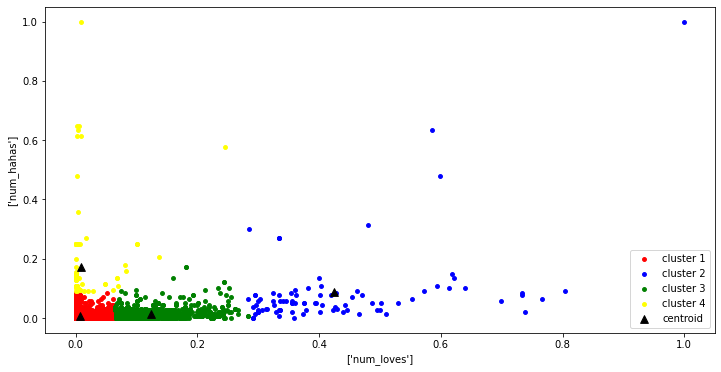

In [130]:
#plot the clustering result in scatter graph
plt.figure(figsize=(12,6))
sizes=15
plt.scatter(clus_1[col[0]], clus_1[col[1]], c='red', label='cluster 1', s=sizes)
plt.scatter(clus_2[col[0]], clus_2[col[1]], c='blue', label='cluster 2', s=sizes)
plt.scatter(clus_3[col[0]], clus_3[col[1]], c='green', label='cluster 3', s=sizes)
plt.scatter(clus_4[col[0]], clus_4[col[1]], c='yellow', label='cluster 4', s=sizes)
plt.scatter(centroids[:, 0], centroids[:, 1], c= 'black', s=sizes*4, label='centroid', marker='^')
plt.xlabel([col[0]])
plt.ylabel([col[1]])
plt.legend()
plt.show()

*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

In [131]:
#i cant find any external validation data to be validate with my clustering result. I am confused with this section, please just give me more guide/clues for this section
from sklearn.metrics import adjusted_rand_score
labels=kmeans1.fit_predict(new_df)

adj_rand_score=adjusted_rand_score(df.status_type, labels)
adj_rand_score

0.051108309182722196

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance


In [143]:
df1=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')
df1.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [133]:
#split data into features (x) and labels (y)
X=df1.iloc[:, 1:5]
Y=df1.iloc[:, 0]
print(X.head())
print(Y.head())

   mass  width  height  color_score
0   192    8.4     7.3         0.55
1   180    8.0     6.8         0.59
2   176    7.4     7.2         0.60
3    86    6.2     4.7         0.80
4    84    6.0     4.6         0.79
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [134]:
#feature scaling to centering teh data points with unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array, columns =X.columns)

X_scaled.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [135]:
from sklearn.decomposition import PCA
#mash the data down into 2 dimensions
n_dimension=2
pca=PCA(n_components=n_dimension)
pca.fit(X_scaled)

X_pca_array=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca_array, columns=['PC1', 'PC2'])
#we got the 2d coordinate for each data point
X_pca.head()

,PC1,PC2
0,1.572169,-1.980044
1,0.878417,-1.579373
2,0.529773,-1.732891
3,-2.712610,0.414674
4,-2.893412,0.242003


In [144]:
#add the fruit label into each coordinate data point so we can use it later in the pot
X_pca['fruit label']=Y
X_pca.head()

,PC1,PC2,PC3,PC4,fruit label
0,1.572169,-1.980044,2.048688,-0.368504,1
1,0.878417,-1.579373,1.899455,-0.166053,1
2,0.529773,-1.732891,1.258227,0.154708,1
3,-2.712610,0.414674,0.923164,0.148685,2
4,-2.893412,0.242003,0.909229,0.298106,2


In [137]:
#so now we can make a 2d scatter plot of the cluster
def plotdata(df, groupby):
    fig, ax=plt.subplots(figsize=(10,10))
    cmap=mpl.cm.get_cmap('prism')
    
    for i,cluster in df.groupby(groupby):
        cluster.plot(ax=ax,
                     kind='scatter',
                     x='PC1', y='PC2',
                     color=cmap(i/(4)),
                     
                     label="%s %i" % (groupby, i),
                     s=30)
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of fruit dataset");

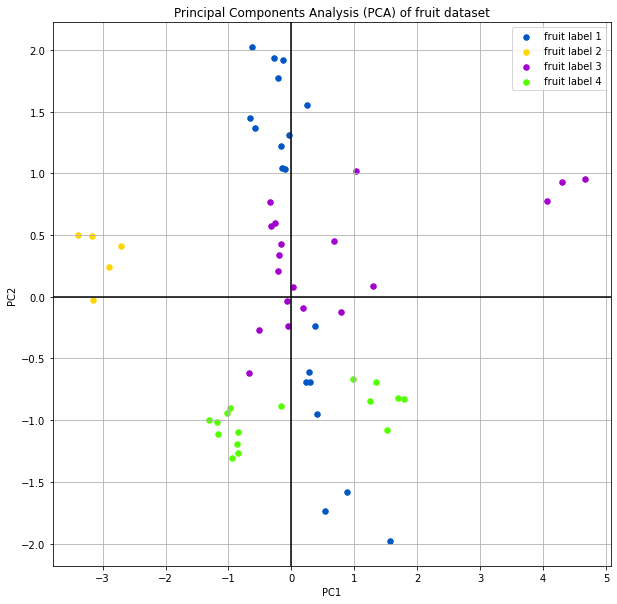

In [138]:
plotdata(X_pca, 'fruit label')

* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [139]:
from sklearn.decomposition import PCA
#mash the data down into 4 dimensions
n_dimension=4
pca=PCA(n_components=n_dimension)
pca.fit(X_scaled)

X_pca_array=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca_array, columns=['PC1', 'PC2', 'PC3', 'PC4'])
#we got the coordinate for each data point
X_pca.head()

,PC1,PC2,PC3,PC4
0,1.572169,-1.980044,2.048688,-0.368504
1,0.878417,-1.579373,1.899455,-0.166053
2,0.529773,-1.732891,1.258227,0.154708
3,-2.712610,0.414674,0.923164,0.148685
4,-2.893412,0.242003,0.909229,0.298106


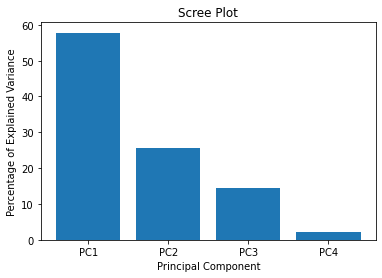

In [140]:
#calculate the percentage of variation that each principal component accounts for
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = X_pca.columns
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
#More half of variatio is along the PC1 and PC2. So 2-D graph, using PC1 and PC2, should do a good job representing the original data

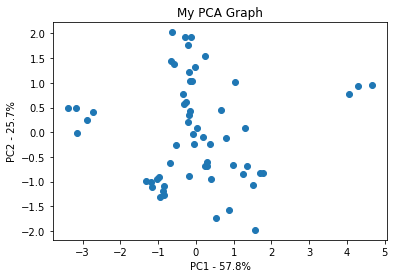

In [141]:
#2D graph with PC1 and PC2
plt.scatter(X_pca.PC1, X_pca.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [142]:
#PRINT RESULT FOR EXPLAINED VARIANCE RATIO
print(pca.explained_variance_ratio_)

[0.57845054 0.25650171 0.14402362 0.02102413]
